<a href="https://colab.research.google.com/github/AntonioFialhoSN/AntonioFialhoSN/blob/main/Equipe_5_Aprendizado_de_M%C3%A1quina_kPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalação das bibliotecas

In [ ]:
!pip install numpy pandas matplotlib scikit-learn seaborn

Importação das bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import KernelPCA, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Carregar o dataset

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/ionosphere/ionosphere.data' #Database da UCI

Carregando os dados

In [3]:
total_features = 34
colunas = [
    'pulse_1', 'pulse_2', 'pulse_3', 'pulse_4', 'pulse_5', 'pulse_6', 'pulse_7', 'pulse_8',
    'pulse_9', 'pulse_10', 'pulse_11', 'pulse_12', 'pulse_13', 'pulse_14', 'pulse_15', 'pulse_16',
    'pulse_17', 'pulse_18', 'pulse_19', 'pulse_20', 'pulse_21', 'pulse_22', 'pulse_23', 'pulse_24',
    'pulse_25', 'pulse_26', 'pulse_27', 'pulse_28', 'pulse_29', 'pulse_30', 'pulse_31', 'pulse_32',
    'azimuth', 'elevation', 'Class'
]

df = pd.read_csv(url, header=None, names=colunas)

In [4]:
# Verificar valores nulos
print(df.isnull().sum())

pulse_1      0
pulse_2      0
pulse_3      0
pulse_4      0
pulse_5      0
pulse_6      0
pulse_7      0
pulse_8      0
pulse_9      0
pulse_10     0
pulse_11     0
pulse_12     0
pulse_13     0
pulse_14     0
pulse_15     0
pulse_16     0
pulse_17     0
pulse_18     0
pulse_19     0
pulse_20     0
pulse_21     0
pulse_22     0
pulse_23     0
pulse_24     0
pulse_25     0
pulse_26     0
pulse_27     0
pulse_28     0
pulse_29     0
pulse_30     0
pulse_31     0
pulse_32     0
azimuth      0
elevation    0
Class        0
dtype: int64


In [5]:
X = df.drop('Class', axis=1)
y = df['Class'].map({'g': 1, 'b': 0})  # Convertendo a Target de valores categóricos para valores numéricos. GOOD = 1, BAD = 0.

Visão geral do Dataset

In [6]:
print("Amostra dos dados:")
print(df.head())

Amostra dos dados:
   pulse_1  pulse_2  pulse_3  pulse_4  pulse_5  pulse_6  pulse_7  pulse_8  \
0        1        0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708   
1        1        0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597   
2        1        0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062   
3        1        0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000   
4        1        0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255   

   pulse_9  pulse_10  ...  pulse_26  pulse_27  pulse_28  pulse_29  pulse_30  \
0  1.00000   0.03760  ...  -0.51171   0.41078  -0.46168   0.21266  -0.34090   
1  1.00000  -0.04549  ...  -0.26569  -0.20468  -0.18401  -0.19040  -0.11593   
2  0.88965   0.01198  ...  -0.40220   0.58984  -0.22145   0.43100  -0.17365   
3  0.00000   0.00000  ...   0.90695   0.51613   1.00000   1.00000  -0.20099   
4  0.77152  -0.16399  ...  -0.65158   0.13290  -0.53206   0.02431  -0.62197   

   pulse_31  pulse_32  azimuth  elevation  

Distribuição de classes



<ipython-input-7-d02518006050>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


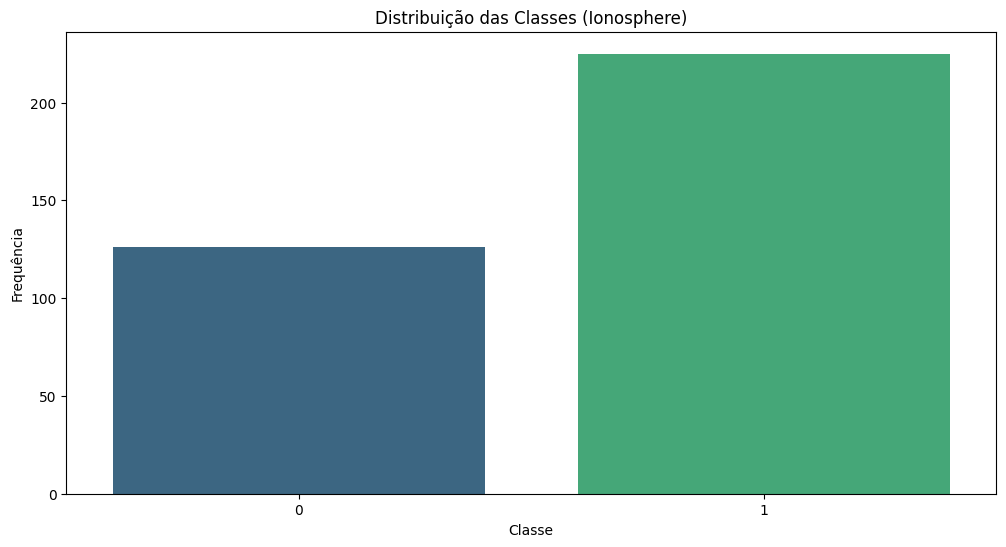

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(x=y, palette="viridis")
plt.title("Distribuição das Classes (Ionosphere)")
plt.xlabel("Classe")
plt.ylabel("Frequência")
plt.show()


Matriz de Correlação

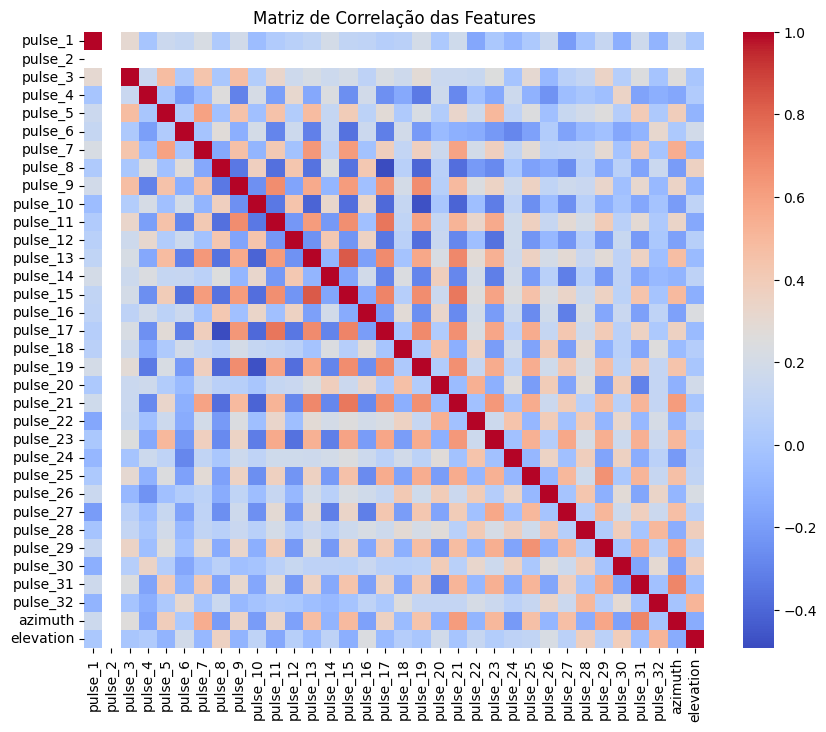

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm')
plt.title("Matriz de Correlação das Features")
plt.show()

Identificação das Features mais Importantes no kPCA

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


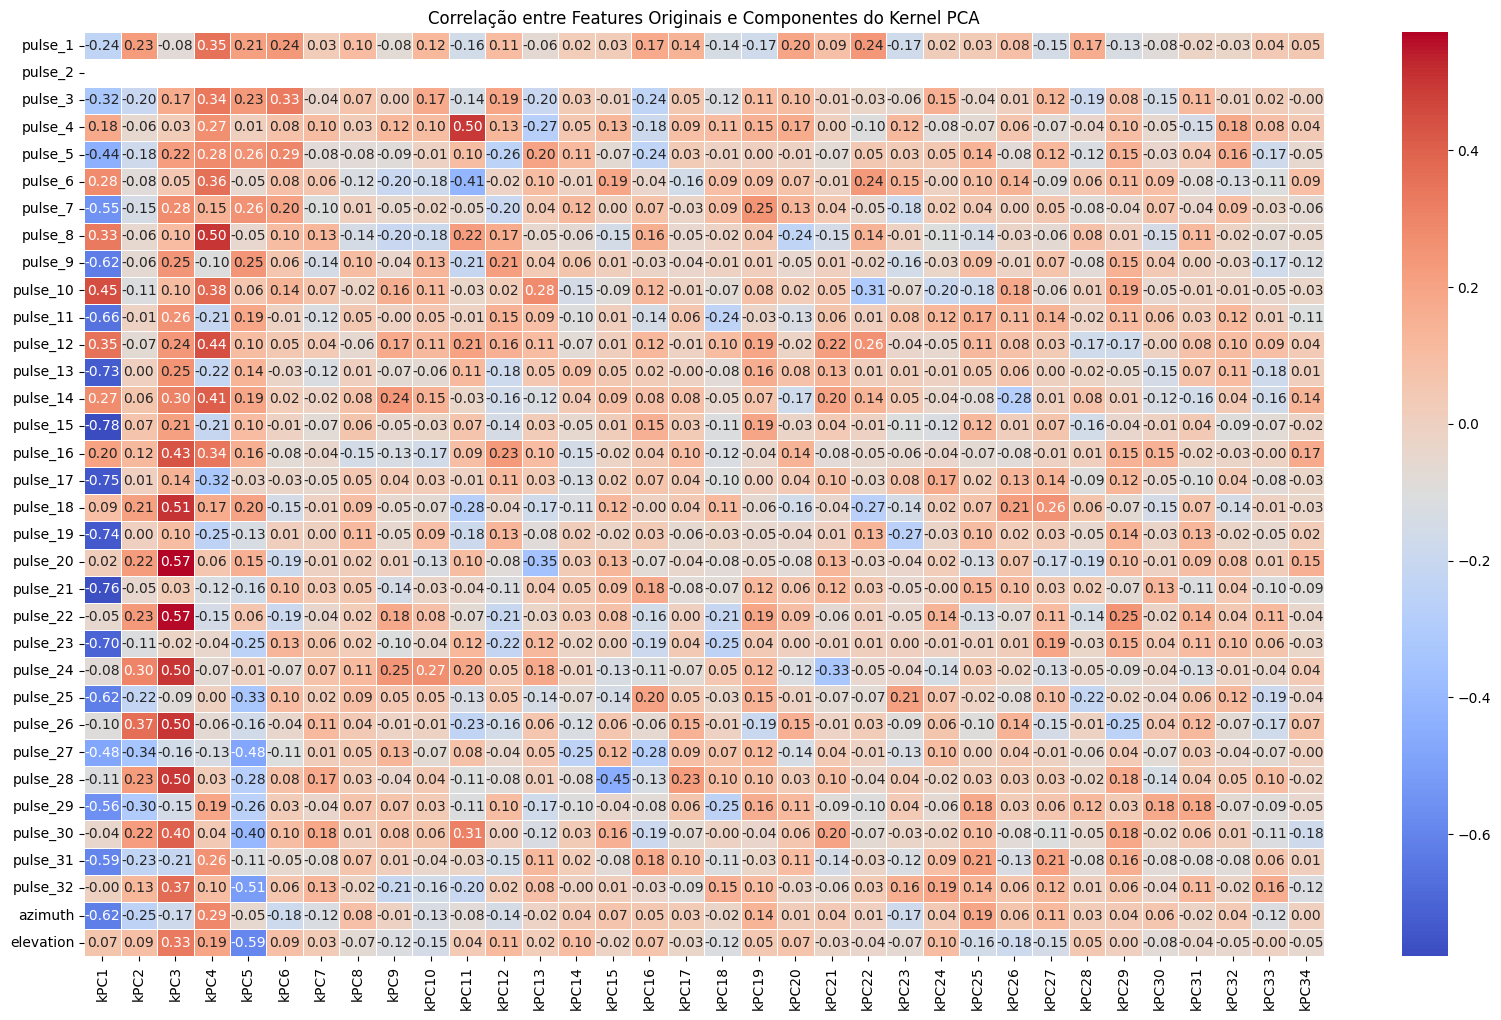

In [9]:
kpca_full = KernelPCA(n_components=len(X.columns), kernel='rbf', gamma=0.1).fit_transform(X)
kpca_components = pd.DataFrame(kpca_full, columns=[f'kPC{i+1}' for i in range(kpca_full.shape[1])])
kpca_correlation = pd.DataFrame(np.corrcoef(X.T, kpca_full.T)[:len(X.columns), len(X.columns):],
                                index=X.columns,
                                columns=[f'kPC{i+1}' for i in range(kpca_full.shape[1])])

plt.figure(figsize=(20, 12))
sns.heatmap(kpca_correlation, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title("Correlação entre Features Originais e Componentes do Kernel PCA")
plt.show()

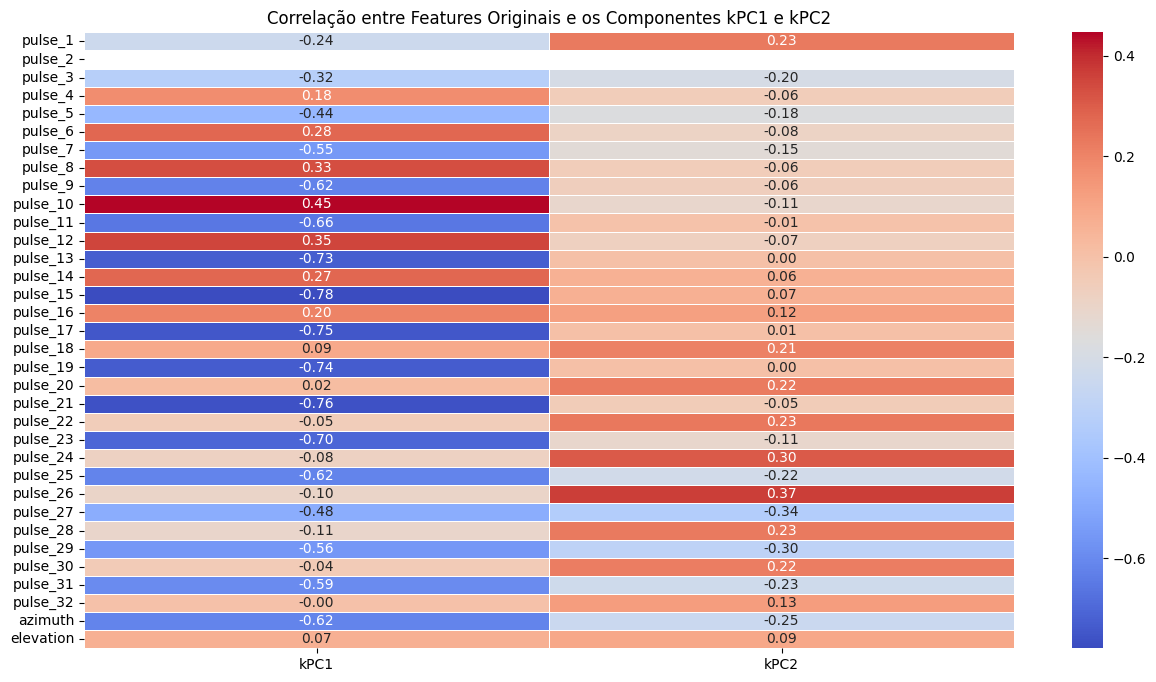

In [10]:
plt.figure(figsize=(15, 8))
sns.heatmap(kpca_correlation[['kPC1', 'kPC2']], cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title("Correlação entre Features Originais e os Componentes kPC1 e kPC2")
plt.show()

In [11]:
top_features_kpca = kpca_correlation.abs().idxmax(axis=0)[:2]
print("Principais Features do kPCA:")
top_features_kpca

Principais Features do kPCA:


,0
kPC1,pulse_15
kPC2,pulse_26


Identificação das Features mais Importantes no PCA

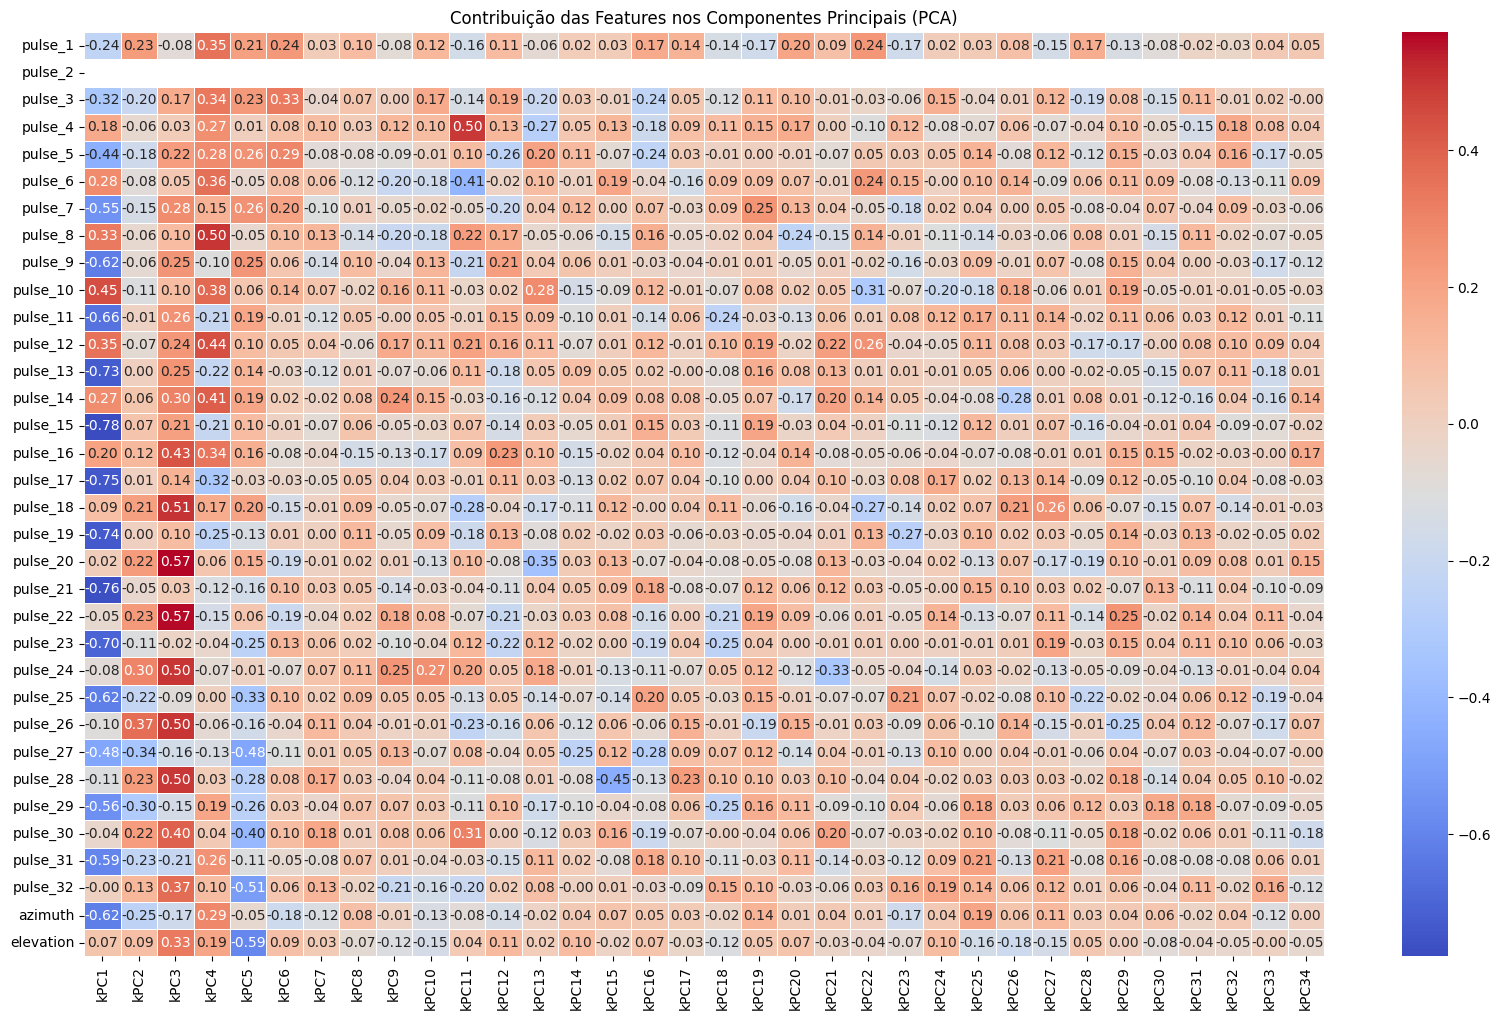

In [12]:
pca_full = PCA().fit(X)
pca_components = pd.DataFrame(pca_full.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(len(X.columns))])

plt.figure(figsize=(20, 12))
sns.heatmap(kpca_correlation, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title("Contribuição das Features nos Componentes Principais (PCA)")
plt.show()

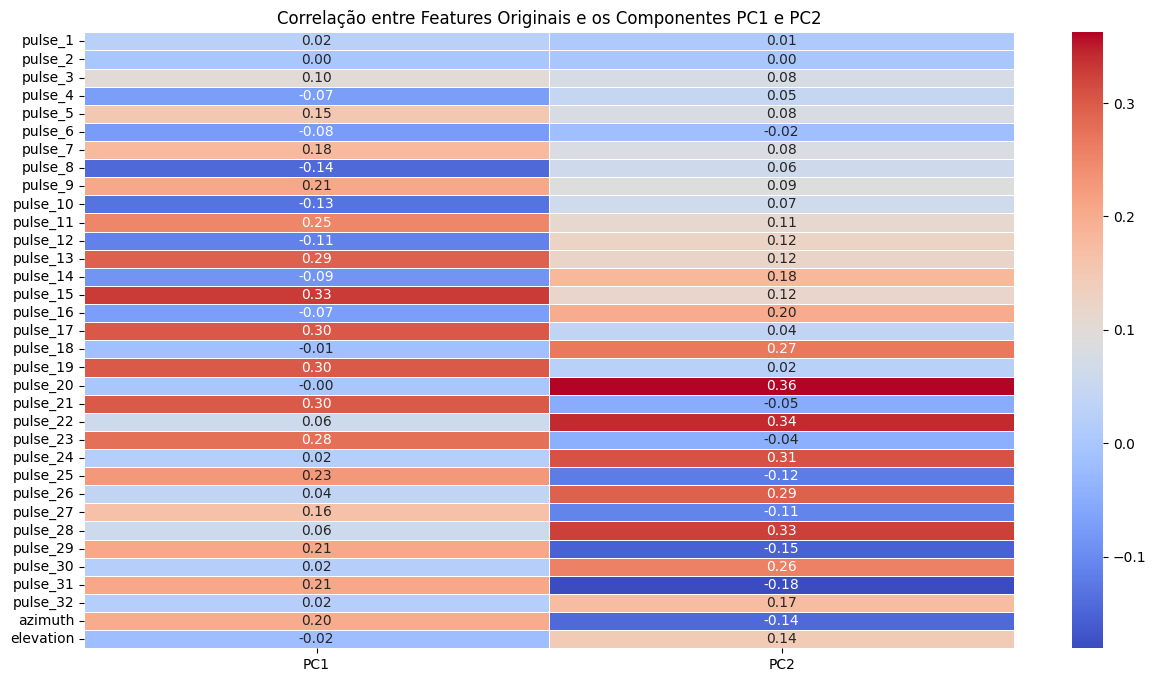

In [13]:
plt.figure(figsize=(15, 8))
sns.heatmap(pca_components.T[['PC1', 'PC2']], cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title("Correlação entre Features Originais e os Componentes PC1 e PC2")
plt.show()

In [14]:
top_features_pca = pca_components.abs().idxmax(axis=1)[:2]
print("Principais Features do PCA:")
top_features_pca

Principais Features do PCA:


,0
PC1,pulse_15
PC2,pulse_20


Pré-processamento

In [15]:
scaler = StandardScaler() #Normalização dos dados
X_scaled = scaler.fit_transform(X)

Variância Explicada

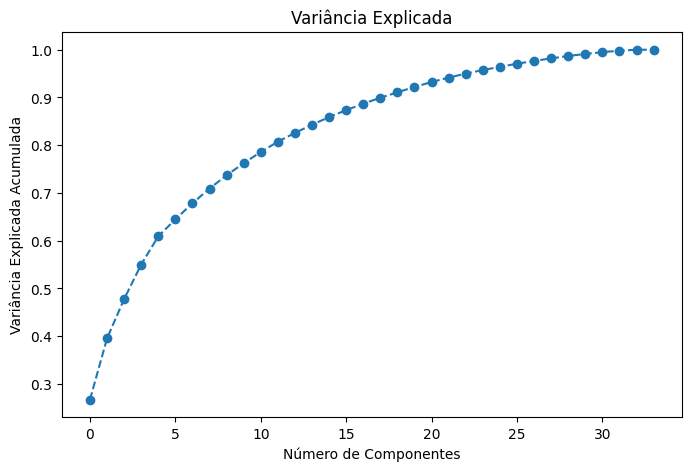

In [16]:
explained_variance = PCA().fit(X_scaled).explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Variância Explicada Acumulada')
plt.title('Variância Explicada')
plt.show()

Aplicar Kernel PCA

In [17]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.15)
X_kpca = kpca.fit_transform(X_scaled)

Aplicar PCA tradicional para comparar

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

Comparação da redução de dimensionalidade

In [19]:
print("Dimensão Original:", X_scaled.shape)
print("Após PCA Tradicional:", X_pca.shape)
print("Após Kernel PCA:", X_kpca.shape)

Dimensão Original: (351, 34)
Após PCA Tradicional: (351, 2)
Após Kernel PCA: (351, 2)


Comparação da Redução de Dimensionalidade

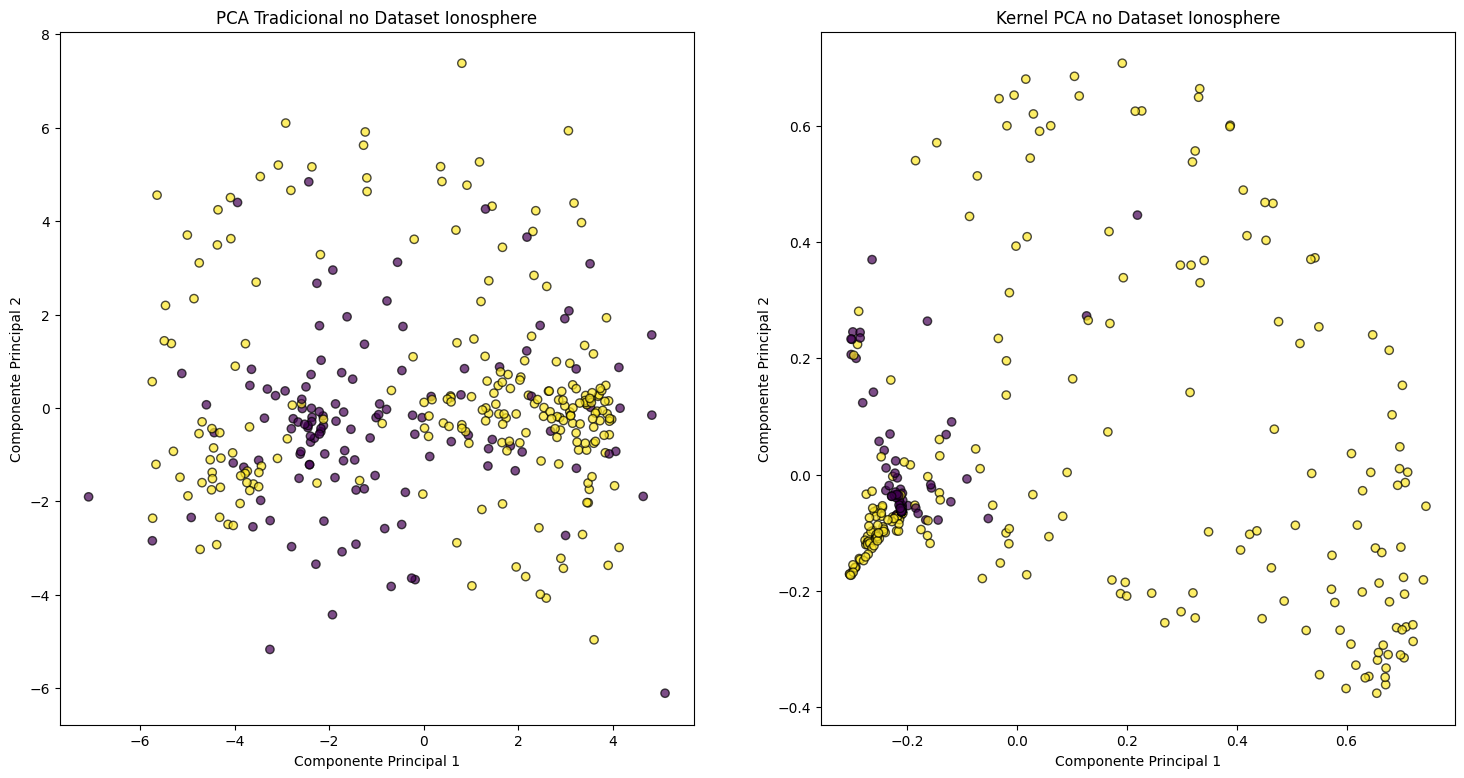

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(18, 9))

axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7, edgecolors='k')
axes[0].set_title("PCA Tradicional no Dataset Ionosphere")
axes[0].set_xlabel("Componente Principal 1")
axes[0].set_ylabel("Componente Principal 2")

axes[1].scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='viridis', alpha=0.7, edgecolors='k')
axes[1].set_title("Kernel PCA no Dataset Ionosphere")
axes[1].set_xlabel("Componente Principal 1")
axes[1].set_ylabel("Componente Principal 2")

plt.show()

Uso dos dados para concepção de um modelo



In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42) # 80% Treino, 20% teste


In [22]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [23]:
kpca = KernelPCA(n_components=2, kernel='rbf', gamma=0.15)
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

In [24]:
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train)
y_pred_pca = knn_pca.predict(X_test_pca)

In [25]:
knn_kpca = KNeighborsClassifier(n_neighbors=5)
knn_kpca.fit(X_train_kpca, y_train)
y_pred_kpca = knn_kpca.predict(X_test_kpca)


In [26]:
# Avaliação com PCA
print("\nKNN com PCA")
print("Acurácia:", accuracy_score(y_test, y_pred_pca))
print(classification_report(y_test, y_pred_pca))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_pca))

print("\n\n\n")

# Avaliação com kPCA
print("\nKNN com Kernel PCA")
print("Acurácia:", accuracy_score(y_test, y_pred_kpca))
print(classification_report(y_test, y_pred_kpca))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_kpca))



KNN com PCA
Acurácia: 0.8028169014084507
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        28
           1       0.80      0.91      0.85        43

    accuracy                           0.80        71
   macro avg       0.81      0.77      0.78        71
weighted avg       0.80      0.80      0.80        71

Matriz de Confusão:
 [[18 10]
 [ 4 39]]





KNN com Kernel PCA
Acurácia: 0.9295774647887324
              precision    recall  f1-score   support

           0       0.87      0.96      0.92        28
           1       0.97      0.91      0.94        43

    accuracy                           0.93        71
   macro avg       0.92      0.94      0.93        71
weighted avg       0.93      0.93      0.93        71

Matriz de Confusão:
 [[27  1]
 [ 4 39]]


Avaliação do modelo com K-Fold Cross-Validation

In [27]:
from sklearn.model_selection import StratifiedKFold

# Definir o número de folds
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Armazenar resultados
acc_pca = []
acc_kpca = []

# Loop de validação cruzada
for train_index, test_index in kf.split(X_scaled, y):
    # Divisão dos dados
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Aplicar PCA e kPCA
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    X_train_kpca = kpca.fit_transform(X_train)
    X_test_kpca = kpca.transform(X_test)

    # Treinar KNN com PCA
    knn_pca = KNeighborsClassifier(n_neighbors=5)
    knn_pca.fit(X_train_pca, y_train)
    y_pred_pca = knn_pca.predict(X_test_pca)
    acc_pca.append(accuracy_score(y_test, y_pred_pca))

    # Treinar KNN com kPCA
    knn_kpca = KNeighborsClassifier(n_neighbors=5)
    knn_kpca.fit(X_train_kpca, y_train)
    y_pred_kpca = knn_kpca.predict(X_test_kpca)
    acc_kpca.append(accuracy_score(y_test, y_pred_kpca))

# Acurácia média
print(f"Acurácia média com PCA: {np.mean(acc_pca):.4f}")
print(f"Acurácia média com kPCA: {np.mean(acc_kpca):.4f}")


Acurácia média com PCA: 0.8146
Acurácia média com kPCA: 0.8917
